<a href="https://colab.research.google.com/github/mofuoku417/multivariate-time-series-prediction-of-crude-palm-oil-price-data-science-approach/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Load the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###Load Data from Github

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mofuoku417/multivariate-time-series-prediction-of-crude-palm-oil-price-data-science-approach/main/cleaned_data/preprocessed.csv")
df.head()

,Date,cno_pri,cpo_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri
0,2002-02-01,455.0,323.0,2.980725,3102.61,423.45,844.0,468.0,578.0,28.67
1,2002-03-01,546.0,345.0,2.980725,3100.45,415.85,799.0,485.0,557.0,24.49
2,2002-04-01,595.0,362.0,2.980725,3199.41,410.77,718.0,466.0,552.0,22.06
3,2002-05-01,636.0,376.0,2.980725,3281.67,414.82,614.0,442.0,574.0,21.64
4,2002-06-01,738.0,383.0,2.980725,3261.65,451.04,619.0,429.0,595.0,22.30


###Feature Selection
####Correlation

In [7]:
#Rearrange the columns
df = df[['Date', 'cpo_pri', 'cno_pri', 'exmaus', 'oli_pri', 'rps_pri', 'pno_pri', 'sbo_pri', 'sfo_pri', 'wti_spri']]

In [14]:
df.corr()
# soybean oil    0.941741044   # 0.938897
# sunflower oil  0.775205041   # -0.211810
# rapeseed oil   0.915504766   # -0.095953
# coconut oil    0.869002225   # 0.859254
# olive oil      0.154381116   # 0.240404
# peanut oil     0.826758802   # 0.750234
# west texas     0.80252       # -0.074827
# exmaus         -0.3094641    # 0.268872

,cpo_pri,cno_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri
cpo_pri,1.000000,0.859254,0.268872,0.240404,-0.095953,0.750234,0.938897,-0.211810,-0.074827
cno_pri,0.859254,1.000000,0.280648,0.398614,-0.255693,0.677719,0.799938,-0.218044,-0.236355
exmaus,0.268872,0.280648,1.000000,-0.034189,-0.531169,0.032313,0.317241,-0.404817,-0.606927
oli_pri,0.240404,0.398614,-0.034189,1.000000,-0.246808,0.300780,0.236679,-0.227023,-0.027588
rps_pri,-0.095953,-0.255693,-0.531169,-0.246808,1.000000,-0.022314,-0.146449,0.769313,0.622688
pno_pri,0.750234,0.677719,0.032313,0.300780,-0.022314,1.000000,0.842045,-0.161027,0.104697
sbo_pri,0.938897,0.799938,0.317241,0.236679,-0.146449,0.842045,1.000000,-0.271889,-0.092781
sfo_pri,-0.211810,-0.218044,-0.404817,-0.227023,0.769313,-0.161027,-0.271889,1.000000,0.353042
wti_spri,-0.074827,-0.236355,-0.606927,-0.027588,0.622688,0.104697,-0.092781,0.353042,1.000000


In [15]:
# +0.30. A weak positive (upward sloping) linear relationship

# +0.50. A moderate positive (upward sloping) linear relationship

# +0.70. A strong positive (upward sloping) linear relationship

# Exactly –1. A perfect negative (downward sloping) linear relationship

# –0.70. A strong negative (downward sloping) linear relationship

# –0.50. A moderate negative (downhill sloping) relationship

# –0.30. A weak negative (downhill sloping) linear relationship

# 0. No linear relationship


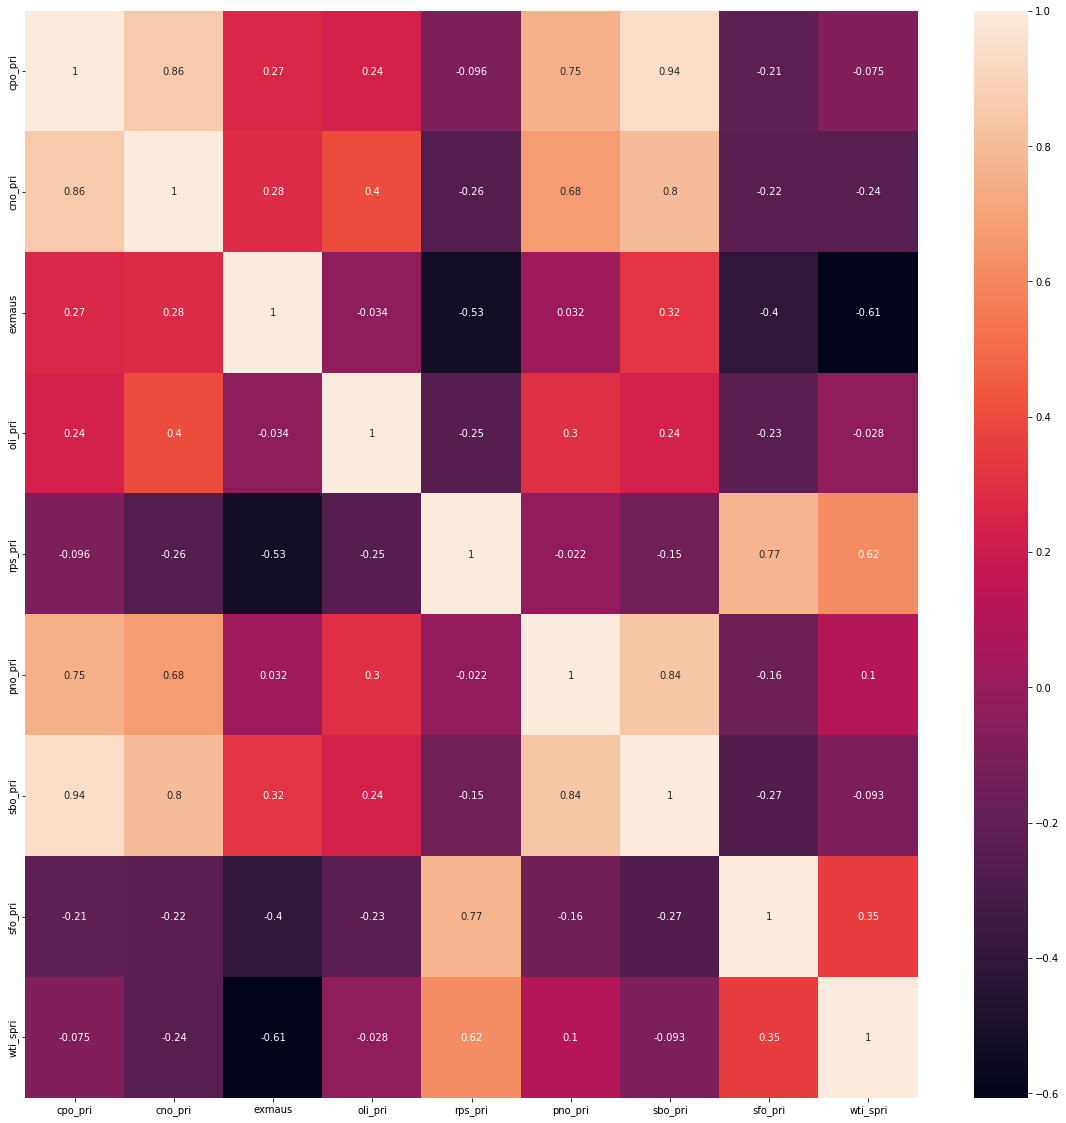

In [8]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

Based on the findings of the correlation analysis, soybean oil, coconut oil, rapeseed oil, sunflower oil, peanut oil prices, crude oil price, and the exchange rate is employed as critical predictors of CPO price in this study.

*   Soybean oil price             ->  0.938897
*   Coconut oil price             ->  0.859254
*   Peanut oil price              ->  0.750234
-------------------------
*   Sunflower oil price           -> -0.211810
*   West texas intermediate price -> -0.074827
*   Exchange rate (exmaus)        -> 0.268872